### Airbnb seattle dataset
Useful facts
* 3818 listings in seattle area
* data collected from 2016-01-04 to 2017-01-02

#### Business questions(Business understanding)
1. what are the neighborhoods with the most expensive listings? the neighborhoods with the most listings?
2. how much do host charge generally? how does that of Seattle compare to Boston?
3. how does the listings price change over time in a year?

#### Data understanding
After asking analytical questions for business understanding, we move to the next phase of data understanding.
1. what are the neighborhoods with the most affordable lodges? the neighborhoods with the most listings?
* In order to answer this question, we need to check the prices and neighorhoods coloumn in the listing dataset
2. how much do host charge generally? how does that of Seattle compare to Boston?
* To answere the question, we need to look at the price coloumn of the listing file of both Seattle and Boston
3. how does the listings price change over time in a year?
* we need to look at the date and price coloumn in the calender dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#read the dataset of seattle and boston
df_cal=pd.read_csv('calendar.csv',engine='python')
df_listing=pd.read_csv('listings.csv',engine='python')
df_rev=pd.read_csv('reviews.csv',engine='python')

df_cal_bo=pd.read_csv('boston_calendar.csv',engine='python')
df_listing_bo=pd.read_csv('boston_listings.csv',engine='python')
df_rev_bo=pd.read_csv('boston_reviews.csv',engine='python')

In [3]:
print('number of rows in listing:',df_listing.shape[0])
print('number of columns in listing:',df_listing.shape[1])
print('columns in listing',df_listing.columns)

number of rows in listing: 3818
number of columns in listing: 99
columns in listing Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type'

In [4]:
#checking the missing values in the df_listing dataframe
df_listing.isnull().mean()

id              0.000000
listing_url     0.000000
scrape_id       0.000000
last_scraped    0.000000
name            0.000000
                  ...   
Unnamed: 94     0.999214
Unnamed: 95     0.999476
Unnamed: 96     0.999476
Unnamed: 97     0.999738
Unnamed: 98     0.999738
Length: 99, dtype: float64

### Question1: how much do host charge for renting their homes?

In [5]:
#data cleaning and transforming
def check_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
#drop rows with missing price 
listing_cleanprice_se=df_listing.dropna(subset=['price'])
#drop rows with non numeric price
listing_cleanprice_se['price']=listing_cleanprice_se['price'].apply(lambda x:x.replace('$','').replace(',',''))
listing_cleanprice_se=listing_cleanprice_se[listing_cleanprice_se['price'].apply(check_float)]
listing_cleanprice_bo=df_listing_bo.dropna(subset=['price'])
listing_cleanprice_bo['price']=listing_cleanprice_bo['price'].apply(lambda x:x.replace('$','').replace(',',''))
listing_cleanprice_bo=listing_cleanprice_bo[listing_cleanprice_bo['price'].apply(check_float)]

#cast the dtype pf price column to float
listing_cleanprice_se['price']=listing_cleanprice_se['price'].astype('float')
listing_cleanprice_bo['price']=listing_cleanprice_bo['price'].astype('float')

e:\crack detection project\env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


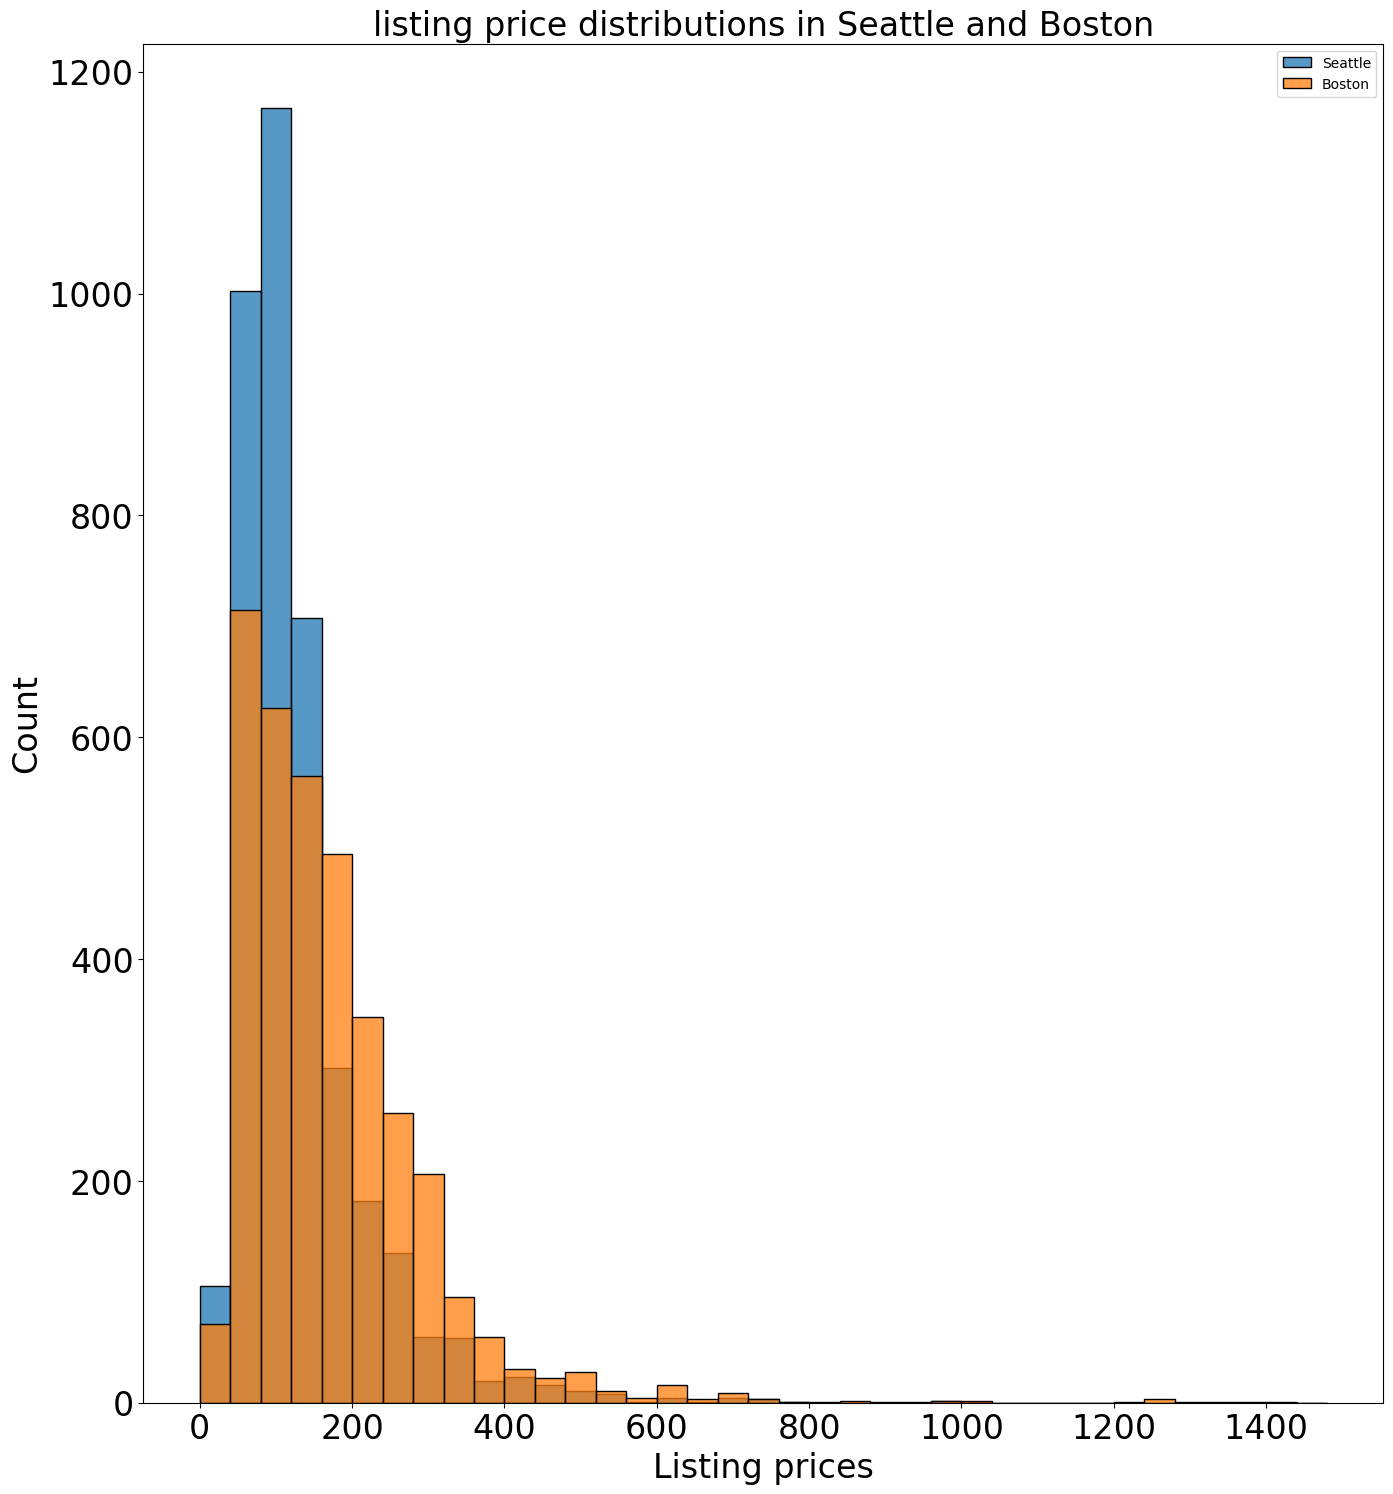

In [6]:
#data visualization: plotting the listing prices distribution in both Seattle and Boston
import seaborn as sb
import matplotlib.pyplot as plt
base_color=sb.color_palette()[0]
base_color2=sb.color_palette()[1]
price_clean=listing_cleanprice_se[listing_cleanprice_se['price']<1500]
price_clean_bo=listing_cleanprice_bo[listing_cleanprice_bo['price']<1500]
plt.figure(figsize=(16,18),dpi=100)
bins=np.arange(0,1500,40)
sb.histplot(data=listing_cleanprice_se,x='price',bins=bins,color=base_color)
sb.histplot(data=listing_cleanprice_bo,x='price',bins=bins,color=base_color2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Listing prices',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('listing price distributions in Seattle and Boston',fontsize=24)
plt.legend(['Seattle','Boston'])
plt.savefig('listing prices distribution in both Seattle and Boston')

### Question2: What are the neighbourhoods that possesses the most listings? neighbourhoods with most affordable listings?

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

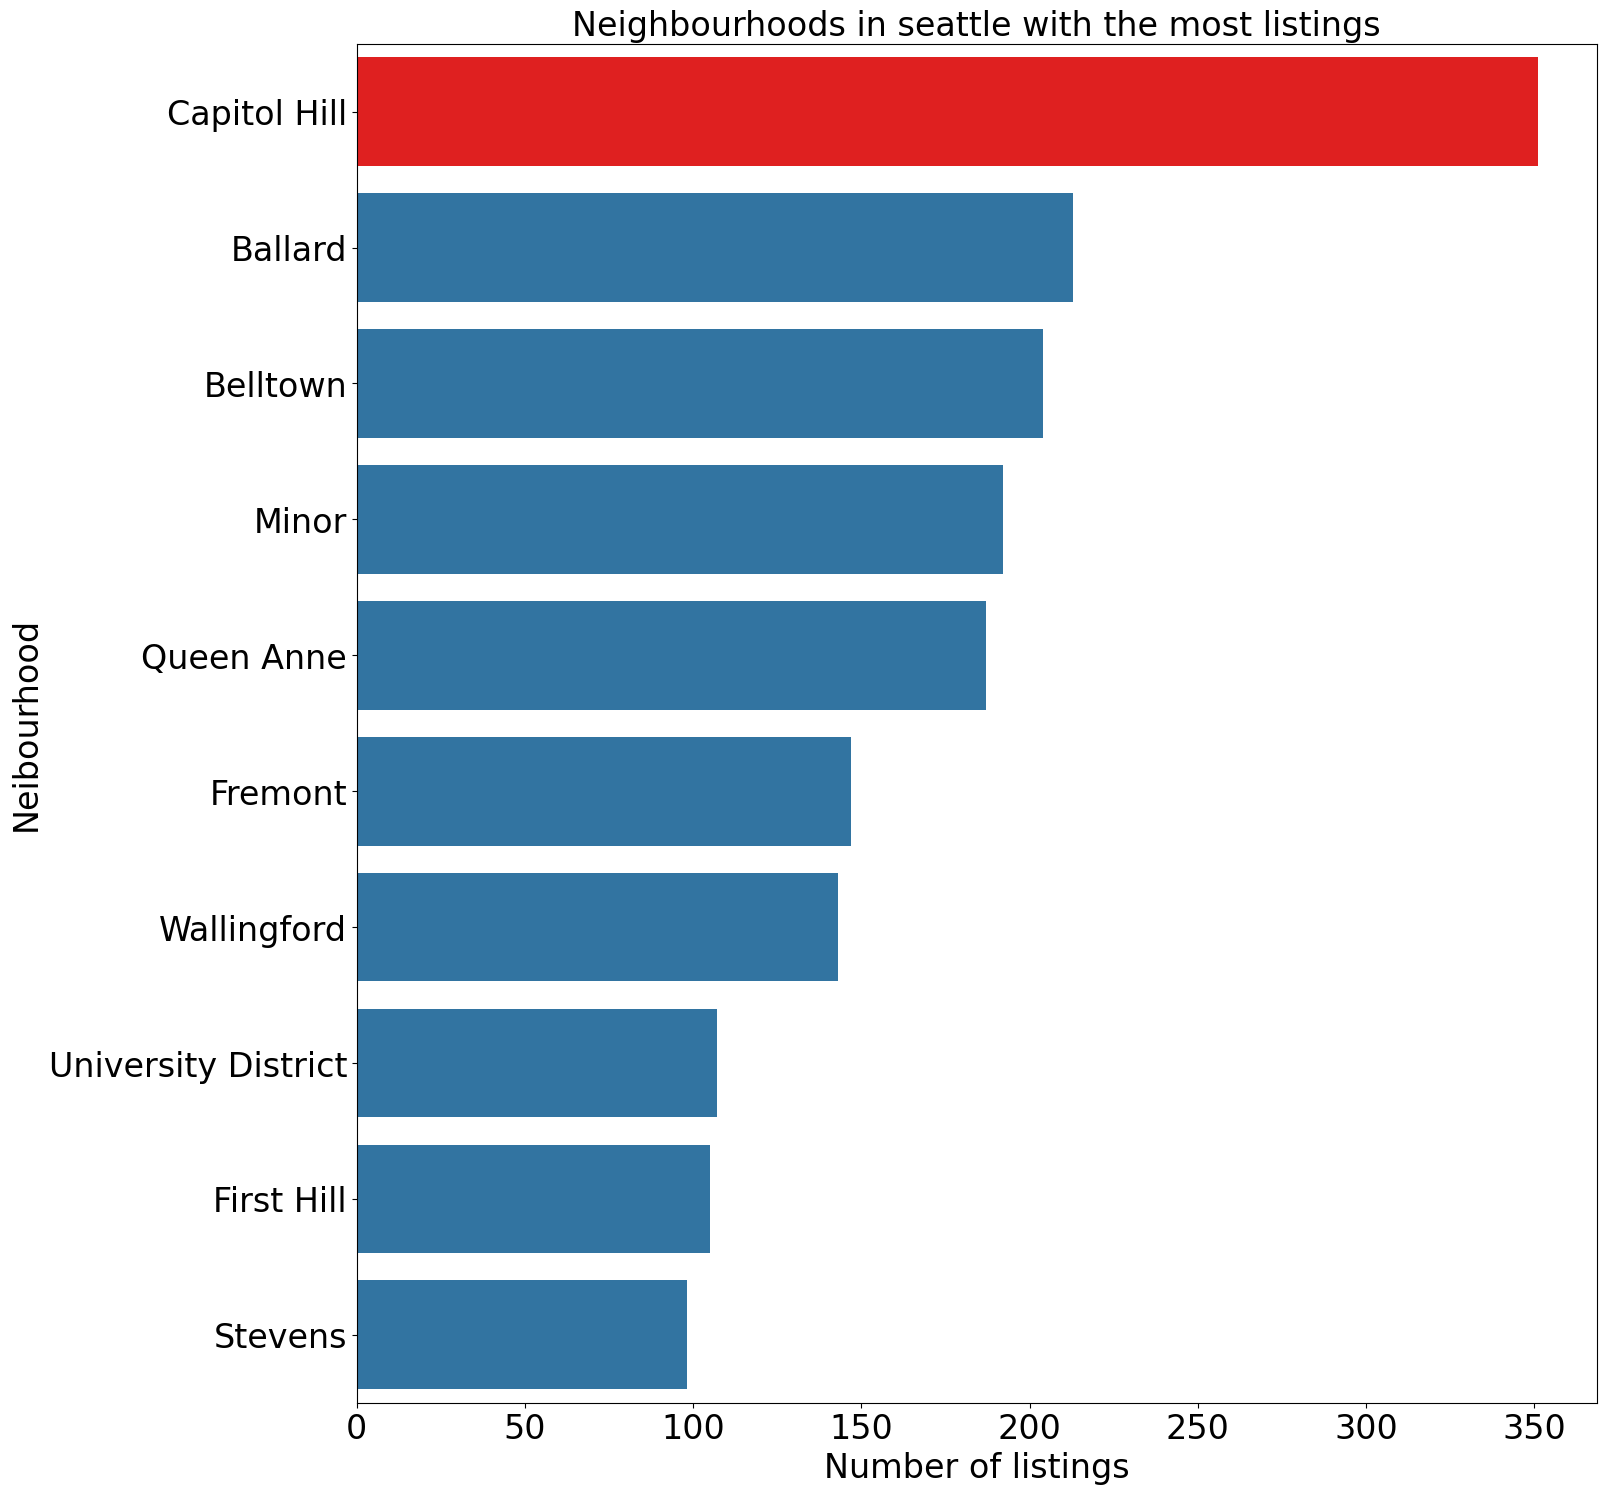

In [8]:
#data visualiztion: plotting the average listing price at different neighbourhoods of Seattle
neigh_counts=df_listing.groupby(by=['neighbourhood'])['id'].count()
mostlistings_orders=neigh_counts.sort_values(ascending=False)[:10].index
base_color=sb.color_palette()[0]
palette=['r' if c=='Capitol Hill' else base_color for c in mostlistings_orders]
plt.figure(figsize=(16,18),dpi=100)
sb.countplot(data=df_listing,y='neighbourhood',palette=palette,order=mostlistings_orders);
plt.xticks(fontsize=24);
plt.yticks(fontsize=24);
plt.xlabel('Number of listings',fontsize=24);
plt.ylabel('Neibourhood',fontsize=24);
plt.title('Neighbourhoods in seattle with the most listings',fontsize=24)
plt.savefig('most listings.png')

In [10]:
top10_neighbourhoods=df_listing['neighbourhood'].value_counts().index[:10]
top10_prices=df_listing['neighbourhood'].value_counts().values[:10]

In [11]:
top10_neighbourhoods

Index(['Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne', 'Fremont',
       'Wallingford', 'University District', 'First Hill', 'Stevens'],
      dtype='object')

In [12]:
top10_prices

array([351, 213, 204, 192, 187, 147, 143, 107, 105,  98], dtype=int64)

We can see that Capitol hill, Ballard and Belltown are the top 3 neighboorhoods with the most and therefore these are the busiest neighbourhoods in terms of listing.

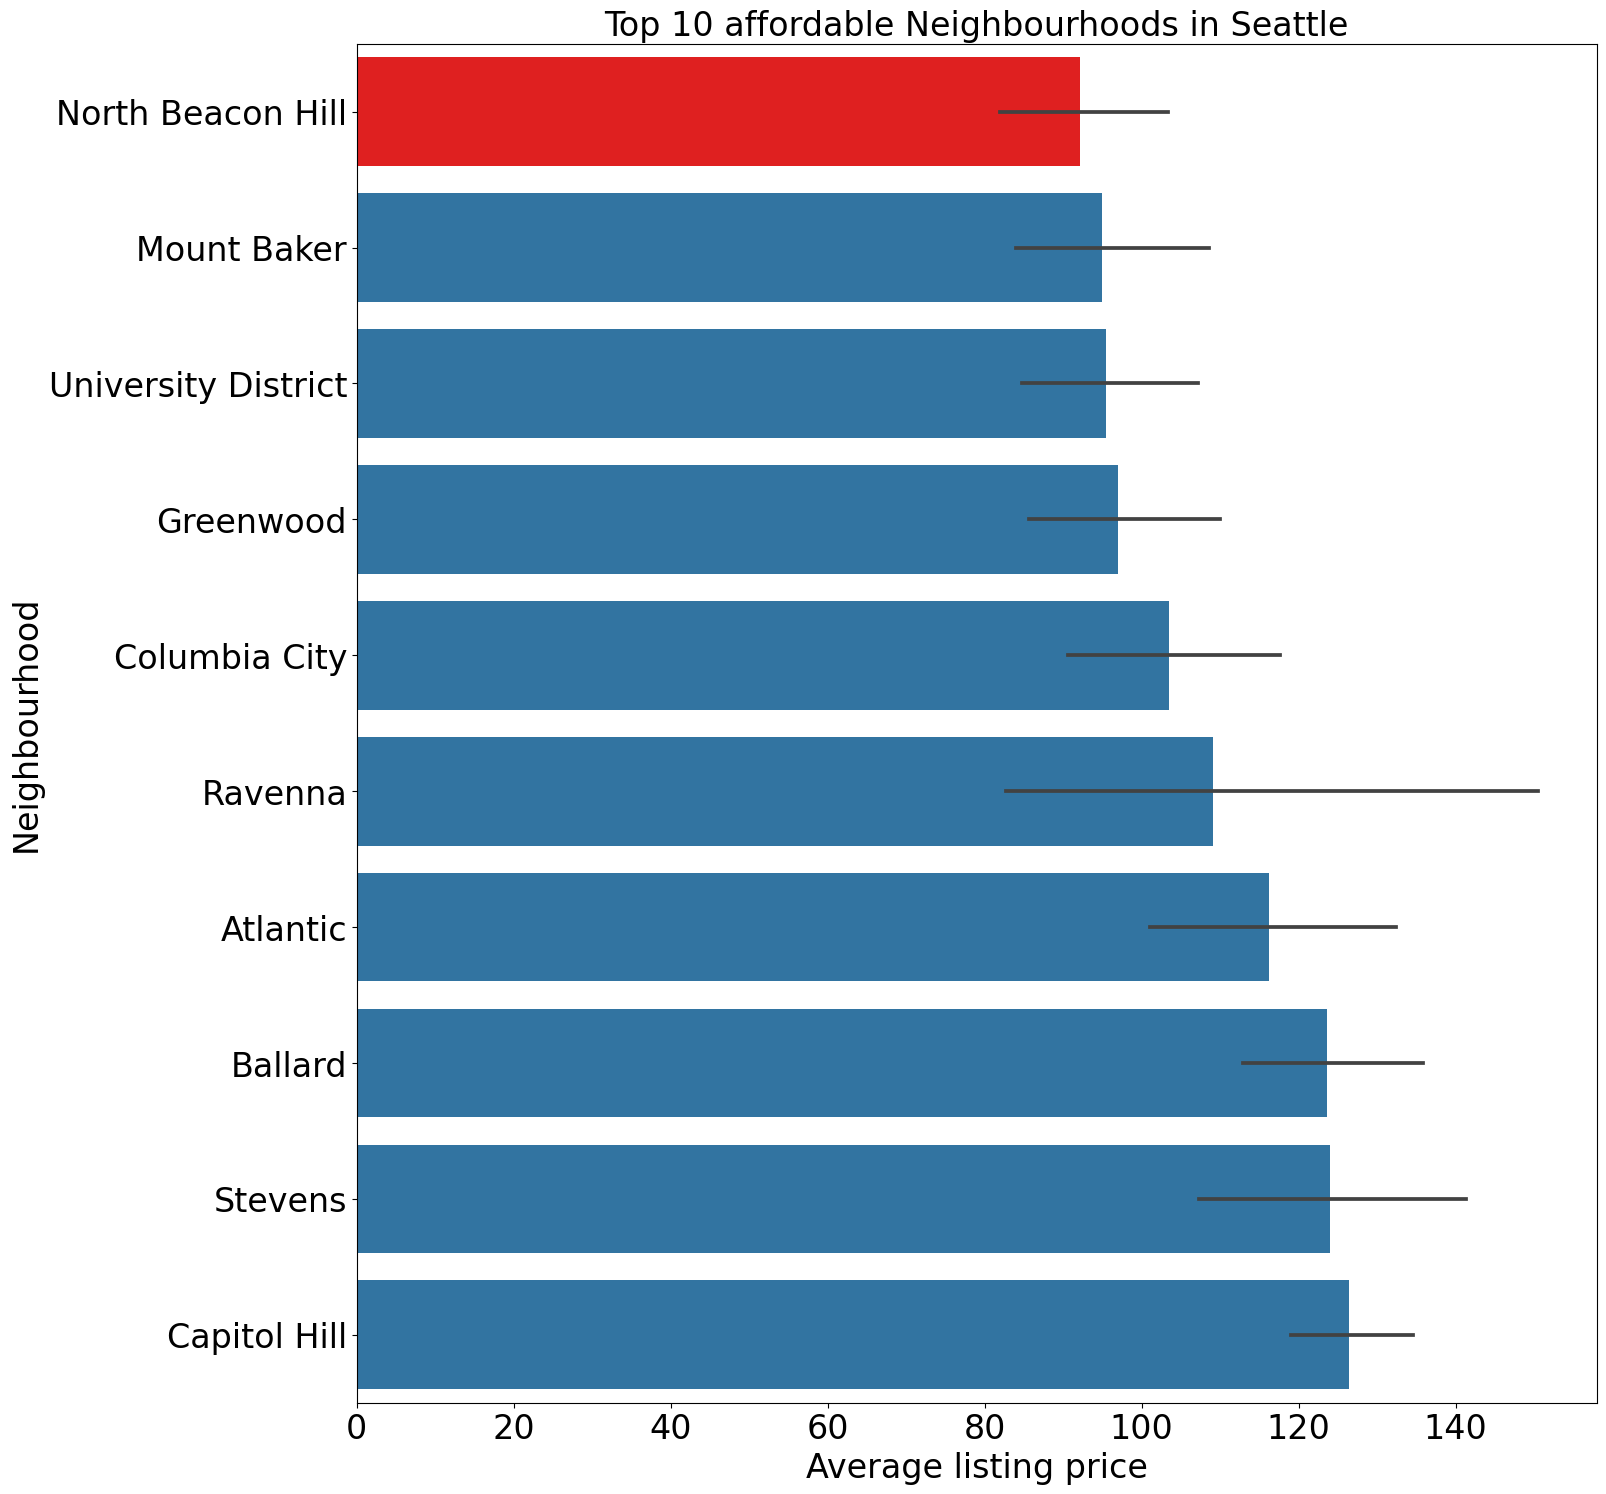

In [9]:
#data visualization: plotting top 10 neighbourhoods with the least listing prices
listing_counts=df_listing['neighbourhood'].value_counts()
above_avg_neigh=listing_counts[listing_counts>listing_counts.mean()].index
#abo_neigh
abo_df=listing_cleanprice_se[listing_cleanprice_se['neighbourhood'].isin(above_avg_neigh)]
abo_order=abo_df.groupby(by='neighbourhood').mean()['price'].sort_values()[:10].index
#abo_df[['neighbourhood','price']].head()
palette=['r' if c=='North Beacon Hill' else base_color for c in abo_order]
plt.figure(figsize=(16,18),dpi=100)
sb.barplot(data=abo_df,y='neighbourhood',x='price',palette=palette,order=abo_order);
plt.yticks(fontsize=24)
plt.xticks(fontsize=24);
plt.xlabel('Average listing price',fontsize=24);
plt.ylabel('Neighbourhood',fontsize=24);
plt.title('Top 10 affordable Neighbourhoods in Seattle',fontsize=24)
plt.savefig('Affordable neighbourhoods.png');

In [14]:
df_affordable_neighbourhoods=abo_df.groupby(by='neighbourhood').mean()['price'].sort_values()[:10]
affordable_neighbourhoods=df_affordable_neighbourhoods.index
affordable_price=df_affordable_neighbourhoods.values
print('top 10 affordable neighourhoods: ',affordable_neighbourhoods,'\n','prices: ',affordable_price)

top 10 affordable neighourhoods:  Index(['North Beacon Hill', 'Mount Baker', 'University District', 'Greenwood',
       'Columbia City', 'Ravenna', 'Atlantic', 'Ballard', 'Stevens',
       'Capitol Hill'],
      dtype='object', name='neighbourhood') 
 prices:  [ 92.09473684  95.          95.42056075  97.03797468 103.54098361
 109.13559322 116.28       123.61502347 123.98979592 126.43304843]


In [ ]:
affordable_neigh

In [ ]:
# #checking the price distribution of listings in Capitol hill, Ballar, Belltown, Minor
# top4=['Fairmount Park','Industrial District','Portage Bay','Westlake']
# #top4=['Capitol Hill','Ballard','Belltown','Minor']
# df_neightop4=df_listing[df_listing['neighbourhood'].isin(top4)][['neighbourhood','price']].dropna(subset=['price'])
# df_neightop4['price']=df_neightop4['price'].apply(lambda x:float(x.replace('$','').replace(',','')))
# g=sb.FacetGrid(data=df_neightop4,col='neighbourhood',col_wrap=2)
# g.map(plt.hist,'price',bins = np.arange(0, df_neightop4['price'].max()+20, 10))
# g.set_titles('{col_name}')
# plt.title('listing prices distributions in neighbourhoods with top 4 average listing prices')
# df_listing['neighbourhood'].value_counts()

From the figures above, it can be seen that averagely Fairmount park, industrial district and portage bay has the highest average listing prices. However, after ploting the listing price distributions in these neighbourhoods, it is found that only a few listings are available in these neighbourhoods, therefore it can yet be concluded that these neighbourhoods are relatively expensive. The average prices of the 10 neighourhoods with the most listings are also plotted. Looking at the data it can be inferred that Queen Anne is relatively expensive neighbourhoods with high average listing prices.

### Question3: How does the prices changes over time in a year?

In [ ]:
df_cal.head()
print('number of days',df_cal['date'].drop_duplicates())

In [ ]:
def prices_change(df):
    '''plot the change of prices against days in a year
    
    Parameters:
    df: padas dataframe that including 'date' and 'price' coloumns
     '''
    df_price=df[['date','price']].dropna(subset=['price'],axis=0)
    df_price['price']=df_price['price'].apply(lambda x:x.replace('$',''))
    df_price['price']=df_price['price'].apply(lambda x:float(x.replace(',','')))
    price_day=df_price.groupby(by='date')['price'].mean()
    price_day=price_day.reset_index().sort_values(by='date')
    plt.errorbar(range(1,366),price_day['price']);
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Day in a year',fontsize=24)
    plt.ylabel('Average listing price',fontsize=24)
    plt.title('Change of average airbnb listing prices in a year in Seattle and Boston',fontsize=24)
    

In [ ]:
#data visualization: plotting the change of listing prices against days in Seattle and Boston
plt.figure(figsize=(16,18))
prices_change(df_cal)
prices_change(df_cal_bo)
plt.legend(['Seattle (Jan 4th,2016-Jan 1st,2017)','Boston (Sep 6th,2016-Sep 5th,2017)'],fontsize=24)
plt.savefig('Change of average airbnb listing prices in Seattle and Boston')

The average listing prices in seattle area changes in a year. It can be seen that the average listing prices are the highest during the month of July and August and lowest at the begining of the year in seattle. The average prices also fluctulate weekly.